## Question 1

## a)

In [1]:
import os
import requests
import json
# Get the current working directory
cwd = os.getcwd()

# Create a folder called "html_files"
folder_path = os.path.join(cwd, "html_files")
os.makedirs(folder_path, exist_ok=True)

# Read the text file containing the URLs
with open('sw-security-urls.txt', 'r') as f:
    urls = f.readlines()

# Iterate over the URLs
for url in urls:
    url = url.strip()
    file_name = url.split('/')[-1]
    file_path = os.path.join(folder_path, file_name)
    response = requests.get(url)
    open(file_path, 'wb').write(response.content)

## b)

In [2]:
from bs4 import BeautifulSoup

# Create an empty list to store the extracted data
extracted_data = []

# Get the current working directory
cwd = os.getcwd()
folder_path = os.path.join(cwd, "html_files")

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    with open(file_path, 'r') as f:
        html_content = f.read()
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Extract the title
    title = soup.find('title').get_text()
    # Extract the main text
    main_text = soup.find('div', {'id': 'bodyContent'}).get_text()
    
    # Extract the JSON-LD metadata
    json_ld = {}
    for script in soup.find_all('script', {'type': 'application/ld+json'}):
        json_ld = json.loads(script.get_text())
        break
    
    # Extract the specified fields from the JSON-LD metadata
    name = json_ld.get("name", "")
    url = json_ld.get("url", "")
    date_published = json_ld.get("datePublished", "")
    headline = json_ld.get("headline", float("nan"))
    
    data_dict={}
    data_dict["title"]=title
    data_dict["main_text"]=main_text
    data_dict["json_ld"]=json_ld
    data_dict["name"]=name
    data_dict["url"]=url
    data_dict["date_published"]=date_published
    data_dict["headline"]=headline
    extracted_data.append(data_dict)

In [3]:
#Output of the list
extracted_data

[{'title': 'Computer emergency response team - Wikipedia',
  'main_text': '\n\n\n\nFrom Wikipedia, the free encyclopedia\n\n\nOrganisation which responds to computer security incidents\nThis article needs additional citations for verification. Please help improve this article by adding citations to reliable sources. Unsourced material may be challenged and removed.Find sources:\xa0"Computer emergency response team"\xa0–\xa0news\xa0· newspapers\xa0· books\xa0· scholar\xa0· JSTOR (December 2016) (Learn how and when to remove this template message)\n\nA computer emergency response team (CERT) is an expert group that handles computer security incidents. Alternative names for such groups include computer emergency readiness team and computer security incident response team (CSIRT). A more modern representation of the CSIRT acronym is Cyber Security Incident Response Team.\n\n\nHistory[edit]\nThe name "Computer Emergency Response Team" was first used in 1988 by the CERT Coordination Center (

## c)

In [4]:
# Create an empty string to store the main text of all the articles
main_text = ""

# Iterate over the list of extracted data
for data in extracted_data:
    main_text += data['main_text']

with open("maintext.txt", "w") as file:
    file.write(main_text)



In [5]:
with open("maintext.txt", "r") as file:
    contents = file.read()
    print(contents)





From Wikipedia, the free encyclopedia


Organisation which responds to computer security incidents
This article needs additional citations for verification. Please help improve this article by adding citations to reliable sources. Unsourced material may be challenged and removed.Find sources: "Computer emergency response team" – news · newspapers · books · scholar · JSTOR (December 2016) (Learn how and when to remove this template message)

A computer emergency response team (CERT) is an expert group that handles computer security incidents. Alternative names for such groups include computer emergency readiness team and computer security incident response team (CSIRT). A more modern representation of the CSIRT acronym is Cyber Security Incident Response Team.


History[edit]
The name "Computer Emergency Response Team" was first used in 1988 by the CERT Coordination Center (CERT-CC) at Carnegie Mellon University (CMU). The term CERT is registered as a trade and service mark by CMU i

## d)

In [6]:
import pandas as pd
articles = pd.DataFrame(extracted_data).set_index('title')
articles

,main_text,json_ld,name,url,date_published,headline
title,,,,,,
Computer emergency response team - Wikipedia,"\n\n\n\nFrom Wikipedia, the free encyclopedia\...","{'@context': 'https://schema.org', '@type': 'A...",Computer emergency response team,https://en.wikipedia.org/wiki/Computer_emergen...,2005-03-13T12:47:29Z,organisation which responds to computer securi...
Secure by default - Wikipedia,"\n\n\n\nFrom Wikipedia, the free encyclopedia\...","{'@context': 'https://schema.org', '@type': 'A...",Secure by default,https://en.wikipedia.org/wiki/Secure_by_default,2005-12-02T00:22:02Z,"security by default, in software"
Cross-site scripting - Wikipedia,"\n\n\n\nFrom Wikipedia, the free encyclopedia\...","{'@context': 'https://schema.org', '@type': 'A...",Cross-site scripting,https://en.wikipedia.org/wiki/Cross-site_scrip...,2003-06-06T11:12:20Z,type of computer security vulnerability typica...
Asset (computer security) - Wikipedia,"\n\n\n\nFrom Wikipedia, the free encyclopedia\...","{'@context': 'https://schema.org', '@type': 'A...",Asset (computer security),https://en.wikipedia.org/wiki/Asset_(computer_...,2010-11-21T12:40:30Z,"any data, device, or other component of the en..."
Software bug - Wikipedia,"\n\n\n\nFrom Wikipedia, the free encyclopedia\...","{'@context': 'https://schema.org', '@type': 'A...",Software bug,https://en.wikipedia.org/wiki/Software_bug,2002-01-30T18:31:01Z,"error, flaw, failure or fault in a computer pr..."
DREAD (risk assessment model) - Wikipedia,"\n\n\n\nFrom Wikipedia, the free encyclopedia\...","{'@context': 'https://schema.org', '@type': 'A...",DREAD (risk assessment model),https://en.wikipedia.org/wiki/DREAD_(risk_asse...,2009-03-09T21:12:18Z,a system for assessing computer security threa...
Security engineering - Wikipedia,"\n\n\n\nFrom Wikipedia, the free encyclopedia\...","{'@context': 'https://schema.org', '@type': 'A...",Security engineering,https://en.wikipedia.org/wiki/Security_enginee...,2001-10-31T10:30:55Z,specialized field of scientific engineering th...
Mobile security - Wikipedia,"\n\n\n\nFrom Wikipedia, the free encyclopedia\...","{'@context': 'https://schema.org', '@type': 'A...",Mobile security,https://en.wikipedia.org/wiki/Mobile_security,2011-01-16T23:47:01Z,safeguards and best practices against security...
DevOps - Wikipedia,"\n\n\n\n\nFrom Wikipedia, the free encyclopedi...","{'@context': 'https://schema.org', '@type': 'A...",DevOps,https://en.wikipedia.org/wiki/DevOps,2010-05-26T18:51:26Z,software development method


In [7]:
articles.T


title,Computer emergency response team - Wikipedia,Secure by default - Wikipedia,Cross-site scripting - Wikipedia,Asset (computer security) - Wikipedia,Software bug - Wikipedia,DREAD (risk assessment model) - Wikipedia,Security engineering - Wikipedia,Mobile security - Wikipedia,DevOps - Wikipedia,Countermeasure (computer) - Wikipedia,...,Database security - Wikipedia,Cyberattack - Wikipedia,Security testing - Wikipedia,Internet security - Wikipedia,Risk factor (computing) - Wikipedia,Security information and event management - Wikipedia,Penetration test - Wikipedia,Automated threat - Wikipedia,Security controls - Wikipedia,Software quality - Wikipedia
main_text,"\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\n\nFrom Wikipedia, the free encyclopedi...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...",...,"\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\...","\n\n\n\nFrom Wikipedia, the free encyclopedia\..."
json_ld,"{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...",...,"{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A...","{'@context': 'https://schema.org', '@type': 'A..."
name,Computer emergency response team,Secure by default,Cross-site scripting,Asset (computer security),Software bug,DREAD (risk assessment model),Security engineering,Mobile security,DevOps,Countermeasure (computer),...,Database security,Cyberattack,Security testing,Internet security,Risk factor (computing),Security information and event management,Penetration test,Automated threat,Security controls,Software quality
url,https://en.wikipedia.org/wiki/Computer_emergen...,https://en.wikipedia.org/wiki/Secure_by_default,https://en.wikipedia.org/wiki/Cross-site_scrip...,https://en.wikipedia.org/wiki/Asset_(computer_...,https://en.wikipedia.org/wiki/Software_bug,https://en.wikipedia.org/wiki/DREAD_(risk_asse...,https://en.wikipedia.org/wiki/Security_enginee...,https://en.wikipedia.org/wiki/Mobile_security,https://en.wikipedia.org/wiki/DevOps,https://en.wikipedia.org/wiki/Countermeasure_(...,...,https://en.wikipedia.org/wiki/Database_security,https://en.wikipedia.org/wiki/Cyberattack,https://en.wikipedia.org/wiki/Security_testing,https://en.wikipedia.org/wiki/Internet_security,https://en.wikipedia.org/wiki/Risk_factor_(com...,https://en.wikipedia.org/wiki/Security_informa...,https://en.wikipedia.org/wiki/Penetration_test

In [8]:
articles.headline.isnull()

title
Computer emergency response team - Wikipedia             False
Secure by default - Wikipedia                            False
Cross-site scripting - Wikipedia                         False
Asset (computer security) - Wikipedia                    False
Software bug - Wikipedia                                 False
DREAD (risk assessment model) - Wikipedia                False
Security engineering - Wikipedia                         False
Mobile security - Wikipedia                              False
DevOps - Wikipedia                                       False
Countermeasure (computer) - Wikipedia                    False
OWASP - Wikipedia                                        False
Code refactoring - Wikipedia                             False
Security bug - Wikipedia                                 False
Buffer overflow - Wikipedia                              False
Vulnerability (computing) - Wikipedia                    False
STRIDE (security) - Wikipedia                    

All articles where headlines is Null are **Software development security, Dynamic application security testing, Static application security testing, Automated threat**.

###  e) Replacing missing data (NaN) in the pandas dataframe with “#empty#”

In [9]:
articles.fillna(value='#empty#', inplace=True)

### f) Store the obtained pandas dataframe

In [10]:
import sqlite3

# Connect to the database (or create it if it doesn't exist)
conn = sqlite3.connect('NLP_articles.db')

# Convert the json_ld column to a string
articles["json_ld"] = articles["json_ld"].apply(lambda x: json.dumps(x))

# Store the DataFrame in the database
articles.to_sql('NLP_articles', conn,index_label="title", if_exists='replace')

# Close the connection
conn.close()

## Question 2

## a)

In [12]:
import nltk
from collections import Counter
from nltk.corpus.reader import PlaintextCorpusReader
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import defaultdict
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

corpus_root = '' 
my_sent_tokenizer = nltk.RegexpTokenizer(r'[^.!?]+')
wiki_corpus = PlaintextCorpusReader(corpus_root, 'maintext.txt', sent_tokenizer=my_sent_tokenizer)
wiki_corpus.fileids()

['maintext.txt']

In [13]:
wiki_corpus.sents()

[['From', 'Wikipedia', ',', 'the', 'free', 'encyclopedia'], ['Organisation', 'which', 'responds', 'to', 'computer', 'security', 'incidents', 'This', 'article', 'needs', 'additional', 'citations', 'for', 'verification'], ...]

In [14]:
c = Counter(wiki_corpus.words())
c.most_common(200)

[('.', 11627),
 (',', 9801),
 ('the', 6900),
 ('-', 5800),
 ('of', 4801),
 ('and', 4388),
 ('to', 3983),
 ('a', 3301),
 ('(', 3132),
 (']', 2785),
 ('"', 2484),
 (':', 2237),
 ('is', 2172),
 ('in', 2064),
 ('^', 1833),
 ('security', 1584),
 ('or', 1488),
 ('for', 1368),
 ('that', 1335),
 ('on', 1291),
 ('.[', 1257),
 ('/', 1213),
 ('[', 1205),
 (').', 1185),
 (')', 1167),
 ('The', 1164),
 ('be', 1152),
 ('as', 1125),
 ('".', 1057),
 ('from', 1040),
 ('by', 1009),
 ('software', 960),
 ('are', 959),
 ('edit', 915),
 ('Security', 895),
 ('with', 871),
 ('Retrieved', 864),
 ('can', 828),
 ('an', 800),
 ('system', 797),
 ("'", 769),
 ('testing', 728),
 (';', 714),
 ('information', 712),
 ('it', 628),
 ('10', 615),
 ('Software', 608),
 ('1', 597),
 ('–', 596),
 ('A', 534),
 ('not', 513),
 ('s', 495),
 ('data', 494),
 ('Information', 480),
 ('code', 462),
 ('doi', 431),
 ('ISBN', 416),
 ('may', 411),
 ('systems', 409),
 ('which', 401),
 ('this', 394),
 ('such', 392),
 ('management', 380),
 ('

## b) Remove the stop words

In [16]:
stopwords_en = stopwords.words('english')
print("Number of English stop words: ", len(stopwords_en))
print("English stop words: ", ", ".join(stopwords_en))


Number of English stop words:  179
English stop words:  i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven

In [17]:
pruned_word_list = []
allwords = defaultdict(lambda: 0)

words = list(filter(None, [re.sub(r'[^A-Za-z]', '', word) for word in wiki_corpus.words()]))
#words

for k in words:
    if k.lower() not in stopwords_en:            
        pruned_word_list.append(k.lower())
        allwords[k.lower()] += 1;
        
c = Counter(pruned_word_list)
c.most_common(200)

[('security', 2481),
 ('software', 1568),
 ('information', 1195),
 ('retrieved', 987),
 ('edit', 915),
 ('testing', 895),
 ('system', 891),
 ('data', 749),
 ('computer', 717),
 ('code', 596),
 ('systems', 568),
 ('may', 566),
 ('management', 534),
 ('application', 459),
 ('doi', 432),
 ('isbn', 416),
 ('development', 405),
 ('web', 397),
 ('also', 367),
 ('used', 365),
 ('risk', 362),
 ('engineering', 354),
 ('access', 349),
 ('use', 340),
 ('malware', 332),
 ('archived', 331),
 ('user', 328),
 ('network', 326),
 ('attack', 320),
 ('threat', 313),
 ('original', 294),
 ('analysis', 282),
 ('control', 282),
 ('vulnerability', 278),
 ('based', 275),
 ('design', 274),
 ('process', 273),
 ('quality', 271),
 ('test', 271),
 ('one', 263),
 ('secure', 262),
 ('b', 257),
 ('e', 246),
 ('vulnerabilities', 246),
 ('requirements', 231),
 ('using', 227),
 ('pdf', 220),
 ('model', 218),
 ('example', 217),
 ('program', 212),
 ('attacks', 212),
 ('time', 206),
 ('protection', 204),
 ('technology', 198

In [19]:
FilteredDict = defaultdict(lambda: 0)
for word in pruned_word_list:
    FilteredDict[word] +=1


In [20]:
FilteredDict

defaultdict(<function __main__.<lambda>()>,
            {'wikipedia': 154,
             'free': 116,
             'encyclopedia': 66,
             'organisation': 10,
             'responds': 4,
             'computer': 717,
             'security': 2481,
             'incidents': 21,
             'article': 190,
             'needs': 48,
             'additional': 70,
             'citations': 42,
             'verification': 56,
             'please': 37,
             'help': 155,
             'improve': 60,
             'adding': 27,
             'reliable': 26,
             'sources': 53,
             'unsourced': 58,
             'material': 29,
             'may': 566,
             'challenged': 17,
             'removed': 27,
             'find': 67,
             'emergency': 50,
             'response': 92,
             'team': 110,
             'news': 51,
             'newspapers': 17,
             'books': 29,
             'scholar': 16,
             'jstor': 16,
           

## c)

(-0.5, 399.5, 199.5, -0.5)

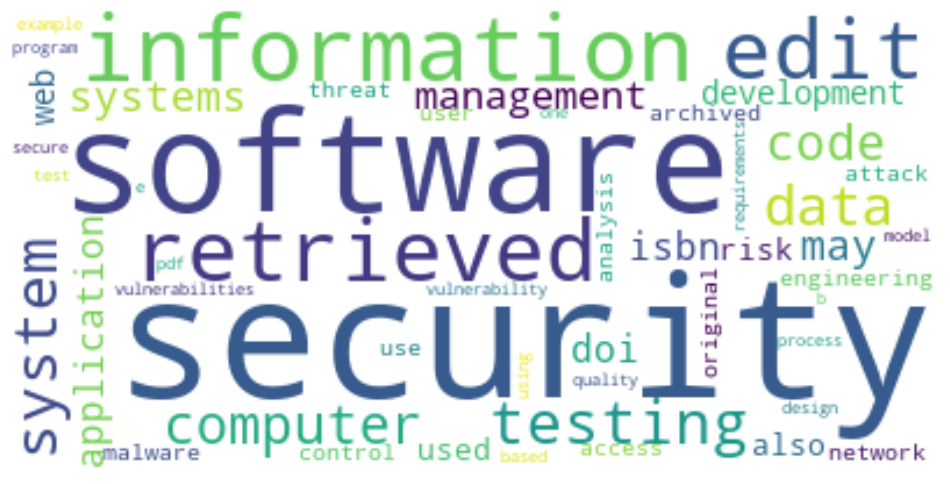

In [18]:
wc = WordCloud(background_color="white", max_words=50)
wc.generate_from_frequencies(allwords)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')